# Europium speciation calculation

using PHREEQC and the Marsac (2017) model for HA complexation

In [1]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt(1:n-8);
PHREEQCpath=[rootpath,'runPHREEQC'];
addpath(PHREEQCpath);
% clear data and number format
clear; format short e

% turn off warnings
warning off

In [2]:
HAconc=1; %mgHA/L so DOC is 2X higher
pH=6.5;
CT=1e-13; % set low amount of inorganic carbon (1e-13)  can't set to zero.  set higher for carbonate media (1e-3)

In [3]:

function [II,GG]=SURFACES

II=[...
3.70E-04
3.70E-04
3.70E-04
3.70E-04
1.85E-04
1.85E-04
1.85E-04
1.85E-04
1.91E-04
1.91E-04
1.91E-04
1.91E-04
1.91E-04
1.91E-04
1.91E-05
1.91E-05
1.91E-05
1.91E-05
1.91E-05
1.91E-05
1.91E-06
1.91E-06
1.91E-06
1.91E-06
1.91E-06
1.91E-06
1.24E-05
1.24E-05
1.24E-05
1.24E-05
1.24E-05
1.24E-05
1.24E-05
1.24E-05
1.24E-06
1.24E-06
1.24E-06
1.24E-06
1.24E-06
1.24E-06
1.24E-06
1.24E-06
1.24E-07
1.24E-07
1.24E-07
1.24E-07
1.24E-07
1.24E-07
1.24E-07
1.24E-07
];

GG=[...
{'Ha_aH'}
{'Ha_bH'}
{'Ha_cH'}
{'Ha_dH'}
{'Ha_eH'}
{'Ha_fH'}
{'Ha_gH'}
{'Ha_hH'}
{'Ha_abH2'}
{'Ha_cdH2'}
{'Ha_aeH2'}
{'Ha_bfH2'}
{'Ha_cgH2'}
{'Ha_dhH2'}
{'Ha_abxH2'}
{'Ha_cdxH2'}
{'Ha_aexH2'}
{'Ha_bfxH2'}
{'Ha_cgxH2'}
{'Ha_dhxH2'}
{'Ha_abxxH2'}
{'Ha_cdxxH2'}
{'Ha_aexxH2'}
{'Ha_bfxxH2'}
{'Ha_cgxxH2'}
{'Ha_dhxxH2'}
{'Ha_abeH3'}
{'Ha_abfH3'}
{'Ha_abgH3'}
{'Ha_abhH3'}
{'Ha_cdeH3'}
{'Ha_cdfH3'}
{'Ha_cdgH3'}
{'Ha_cdhH3'}
{'Ha_abeyH3'}
{'Ha_abfyH3'}
{'Ha_abgyH3'}
{'Ha_abhyH3'}
{'Ha_cdeyH3'}
{'Ha_cdfyH3'}
{'Ha_cdgyH3'}
{'Ha_cdhyH3'}
{'Ha_abeyyH3'}
{'Ha_abfyyH3'}
{'Ha_abgyyH3'}
{'Ha_abhyyH3'}
{'Ha_cdeyyH3'}
{'Ha_cdfyyH3'}
{'Ha_cdgyyH3'}
{'Ha_cdhyyH3'}
];

end


In [4]:
function II=exportspecies(REE)

II=[...
   {'Ha_aREE+2'}
{'Ha_bREE+2'}
{'Ha_cREE+2'}
{'Ha_dREE+2'}
{'Ha_eREE+2'}
{'Ha_fREE+2'}
{'Ha_gREE+2'}
{'Ha_hREE+2'}
{'Ha_abREE+'}
{'Ha_cdREE+'}
{'Ha_aeREE+'}
{'Ha_bfREE+'}
{'Ha_cgREE+'}
{'Ha_dhREE+'}
{'Ha_abxREE+'}
{'Ha_cdxREE+'}
{'Ha_aexREE+'}
{'Ha_bfxREE+'}
{'Ha_cgxREE+'}
{'Ha_dhxREE+'}
{'Ha_abxxREE+'}
{'Ha_cdxxREE+'}
{'Ha_aexxREE+'}
{'Ha_bfxxREE+'}
{'Ha_cgxxREE+'}
{'Ha_dhxxREE+'}
{'Ha_abeREE'}
{'Ha_abfREE'}
{'Ha_abgREE'}
{'Ha_abhREE'}
{'Ha_cdeREE'}
{'Ha_cdfREE'}
{'Ha_cdgREE'}
{'Ha_cdhREE'}
{'Ha_abeyREE'}
{'Ha_abfyREE'}
{'Ha_abgyREE'}
{'Ha_abhyREE'}
{'Ha_cdeyREE'}
{'Ha_cdfyREE'}
{'Ha_cdgyREE'}
{'Ha_cdhyREE'}
{'Ha_abeyyREE'}
{'Ha_abfyyREE'}
{'Ha_abgyyREE'}
{'Ha_abhyyREE'}
{'Ha_cdeyyREE'}
{'Ha_cdfyyREE'}
{'Ha_cdgyyREE'}
{'Ha_cdhyyREE'}
];

for i=1:length(II)
    str=II(i);
    newStr=strrep(str,'REE',REE);
    II(i)=newStr;
end

In [5]:
logEuT=-9:0.05:-5.9; EuT=10.^logEuT;
HAconc=HAconc/1000; %convert to g/L for PHREEQC input
NO3T=3*EuT; 
ClT=0.0578e-3; 
SO4T=0.25e-3; 
NaT=0.078e-3*2; %just count extra K as Na (only comes into ionic strength calc)
CaT=0.25e-3;
MgT=0.25e-3; 
ionicstrength=0.5*(NaT+4*CaT+4*MgT+4*SO4T+ClT);
T=25; pe=20.75-pH; acid=['NaOH'];
totalnames=[{'Eu'}; {'Na'}; {'Cl'}; {'N(+5)'}; {'C(+4)'}; {'S(6)'}; {'Ca'}; {'Mg'}]; 
minerals=[{'Eu(OH)3'}; {'Eu2(CO3)3:3H2O'}; {'Eu(OH)2Cl'}; {'Eu2(SO4)3:8H2O'}; {'EuCl3:6H2O'}; ...
    {'Eu(NO3)3:6H2O'}; {'Eu(OH)2.5Cl.5'}; {'Eu(OH)2Cl'}; {'Eu2O3(cubic)'}; {'Eu2O3(monoclinic)'}; ...
    {'EuOCl'}; {'EuCl3'}; {'EuOHCO3'}; {'Calcite'}; {'Dolomite(disordered)'}; {'Magnesite'}];% {'EuPO4:10H2O'}]; 
speciesexport=exportspecies(totalnames(1));
speciesexport(51,1)={'Eu+3'};

In [6]:

[surfaceconcs,SURFACENAMES]=SURFACES; 
SURFACECONCS=HAconc*surfaceconcs;
dummysurfacearea=1e6;
database=['Marsac2017EuIIIsolids.dat']; show=0; %0 no output to screen. 1 output to screen


In [7]:
for k=1:length(EuT);
    totalvector=[EuT(k); NaT; ClT; NO3T(k); CT; SO4T; CaT; MgT];
    [solutionspeciesconcs, speciesnames, solidconcs, solidnames]=...
    runPHREEQCv2(T,pH,pe,HAconc,totalnames,totalvector,minerals,...
    SURFACECONCS,SURFACENAMES,speciesexport,ionicstrength,dummysurfacearea,database,show,acid);
    %convert phreeqc variable names for solids to matlab permissible names. set
    %solid concs as variable names
    for i=1:length(solidconcs)
         tst=cell2mat(solidnames(i));
         for j=1:length(tst)
             if tst(j)=='('; tst(j)='L'; end
             if tst(j)==')'; tst(j)='R'; end
             if tst(j)==':'; tst(j)='C'; end
             if tst(j)=='.'; tst(j)='p'; end
         end
         txt=[tst,'=solidconcs(i);']; eval(txt); % take out the semicolon after (i) if you want to see the solids listed with concs
    end

    organicbound(k)=sum(solutionspeciesconcs(1:50));
    solidbound(k)=EuLOHR3+2*Eu2LCO3R3C3H2O+EuLOHR2Cl+Eu2LSO4R3C8H2O+EuCl3C6H2O+EuLNO3R3C6H2O+EuLOHR2p5Clp5+EuLOHR2Cl+...
        Eu2O3LcubicR + Eu2O3LmonoclinicR+EuOCl+EuCl3+EuOHCO3; % don't forget stoichiometry!
    inorganicbound(k)=EuT(k)-organicbound(k)-solidbound(k);
    Eufree(k)=solutionspeciesconcs(51);
end

ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


ans =          0


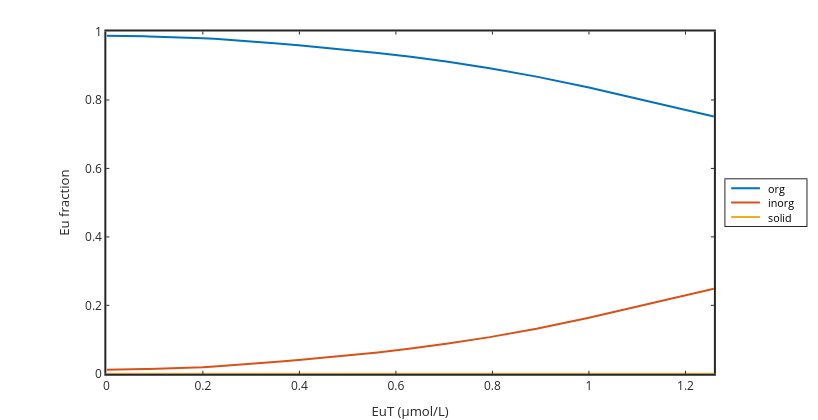

In [8]:
graphics_toolkit("plotly")
plot(EuT*1e6,organicbound./EuT,'linewidth',2,EuT*1e6,inorganicbound./EuT,'linewidth',2,EuT*1e6,solidbound./EuT,'linewidth',2)
legend('org','inorg','solid','location','eastoutside')
set(gca,'linewidth',2,'fontsize',12)
xlabel('EuT (\mumol/L)'); ylabel('Eu fraction')
axis([0 max(EuT*1e6) 0 1])
